# Image compression

In this problem, we are going to use k-means to compress images by reducing the number of colors.

The input image is $512 \times 512$ pixel size each of which is described by a $24$-bit color ($8$ bit per RGB channel). If you store the image pixel-wise it will take $512 \times 512 \times 3 = 786432$ bytes.

If we reduce the number of colors, this will reduce the number of bits stored significantly. In order to ensure the quality of the compressed images, we have to figure out what colors to keep the maximum information. Here is where k-means steps in. We will find 16 groups of similar colors and change every 24-bit color to the centroid of the corresponding group.

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Initialization

Loading an image for compression.

In [3]:
input_image_file = "mandrill-large.png"

Number of colors for the output image (i.e. number of clusters).

In [4]:
num_colors = num_clusters = 16

Random seed.


In [5]:
random_seed = 42

## Loading the data

Loading the data as an array of pixels.

In [6]:
input_img = img.imread(input_image_file)

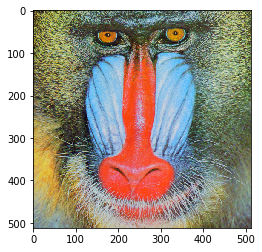

In [7]:
plt.imshow(input_img)
plt.show()

Initializing $m \times n$ training matrix.

In [8]:
color_depth = input_img.shape[-1]

In [9]:
X = input_img.reshape(-1, color_depth)

In [10]:
X.shape

(262144, 3)

## K-Means clustering

In [11]:
np.random.seed(random_seed)

Initialize centroids as colors of random pixels of the picture.

In [12]:
# =============== TODO: Your code here ===============
# Initialize centroids

centroids = []

while len(centroids) < num_clusters:
    next_centroid = X[np.random.randint(0, X.shape[0])]
    if not any(np.array_equal(x, next_centroid) for x in centroids):
        centroids.append(next_centroid)
# ====================================================

In [13]:
centroids

[array([0.3372549, 0.3019608, 0.1764706], dtype=float32),
 array([0.29411766, 0.34509805, 0.27450982], dtype=float32),
 array([0.54509807, 0.77254903, 0.93333334], dtype=float32),
 array([0.94509804, 0.3647059 , 0.08627451], dtype=float32),
 array([0.40392157, 0.4117647 , 0.24313726], dtype=float32),
 array([0.29411766, 0.23921569, 0.11764706], dtype=float32),
 array([0.7176471 , 0.8       , 0.85490197], dtype=float32),
 array([0.827451  , 0.6901961 , 0.31764707], dtype=float32),
 array([0.49411765, 0.59607846, 0.5803922 ], dtype=float32),
 array([0.20784314, 0.3647059 , 0.24313726], dtype=float32),
 array([0.48235294, 0.45490196, 0.39607844], dtype=float32),
 array([0.78039217, 0.7490196 , 0.69803923], dtype=float32),
 array([0.4509804 , 0.68235296, 0.9098039 ], dtype=float32),
 array([0.6156863 , 0.68235296, 0.69411767], dtype=float32),
 array([0.654902 , 0.7058824, 0.6784314], dtype=float32),
 array([0.41568628, 0.7058824 , 0.84705883], dtype=float32)]

Initizlizing a variable for storing closest centroids for every pixel.

In [14]:
closest_centroids = np.zeros(len(X))

Find the closest centroid for every data point.

In [15]:
def get_closest_centroids(X, centroids):
    # =============== TODO: Your code here ===============
    # Find the index of the closest centroid for each data point. The function should return np.araay.
    print("Choosing closest centroids")
    def closest_centroid_index(point, centroids):
        distances = np.sum((centroids - point)**2, axis=1)
        return np.argmin(distances)
    
    return np.apply_along_axis(closest_centroid_index, 1, X, centroids)
    # ====================================================

Move centroids to the mean of all assigned points.

In [16]:
def move_centroids(X, closest_centroids, num_clusters):
    # =============== TODO: Your code here ===============
    # Recompute the coordinates of each centroid. The function should return np.araay.
    print("Moving centroids")
    new_centroids = []
    
    for i in range(num_clusters):
        number_points = sum(closest_centroids == i)
        new_centroids.append(sum(X[closest_centroids == i])/number_points)
        
    return new_centroids
    # ====================================================

Compute k-means cost function.

In [17]:
def kmeans_objective(X, centroids, closest_centroids):
    # =============== TODO: Your code here ===============
    # Compute the K-Means objective function.
    print("Calculating the objective function")
    sum_of_distances = 0
    
    for i in np.unique(closest_centroids):
        sum_of_distances += np.sum((X[closest_centroids == i] - centroids[i])**2)
    
    
    return sum_of_distances/X.shape[0]
    # ====================================================

Implement k-means iteration until convergence.

In [18]:
objective_history = []
convergence = False
iteration = 0
while not convergence:
    # =============== TODO: Your code here ===============
    # Implement k-means iteration until convergence.    
    closest_centroids = get_closest_centroids(X,centroids)
    centroids = move_centroids(X,closest_centroids,num_clusters)
    
    # ====================================================
    # Compute the objective.
    objective = kmeans_objective(X, centroids, closest_centroids)
    objective_history.append(objective)
    if iteration > 0 and abs(objective_history[iteration-1]-objective) < 0.0001:
        convergence = True
    # Increase iteration counter
    iteration += 1
    
    print("Iteration: {0:2d}    Objective: {1:.4f}".format(iteration, objective))

Choosing closest centroids
Moving centroids
Calculating the objective function
Iteration:  1    Objective: 0.0139
Choosing closest centroids
Moving centroids
Calculating the objective function
Iteration:  2    Objective: 0.0123
Choosing closest centroids
Moving centroids
Calculating the objective function
Iteration:  3    Objective: 0.0117
Choosing closest centroids
Moving centroids
Calculating the objective function
Iteration:  4    Objective: 0.0115
Choosing closest centroids
Moving centroids
Calculating the objective function
Iteration:  5    Objective: 0.0113
Choosing closest centroids
Moving centroids
Calculating the objective function
Iteration:  6    Objective: 0.0111
Choosing closest centroids
Moving centroids
Calculating the objective function
Iteration:  7    Objective: 0.0110


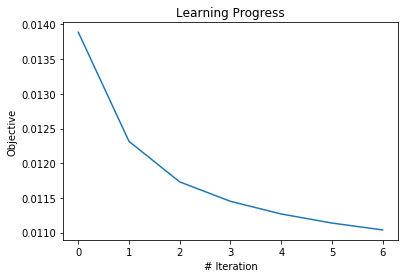

In [19]:
ax = plt.plot(objective_history)[0].axes

ax.set(xlabel="# Iteration")
ax.set(ylabel="Objective")
ax.set(title="Learning Progress")

plt.show()

## Compression results

Represent each point as a closest centroid.

In [20]:
output_img = np.array([centroids[i] for i in list(closest_centroids)]).reshape(input_img.shape)

Compare original and compressed images.

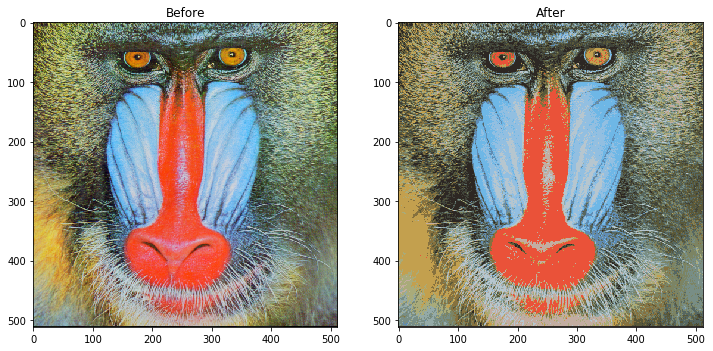

In [21]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(12, 12))

ax_before.imshow(input_img)
ax_after.imshow(output_img)

ax_before.set(title="Before")
ax_after.set(title="After")

plt.show()